## Classical Electrodynamics II
### Assignment 02

Name : Santanu Dutta

#### Problem 01

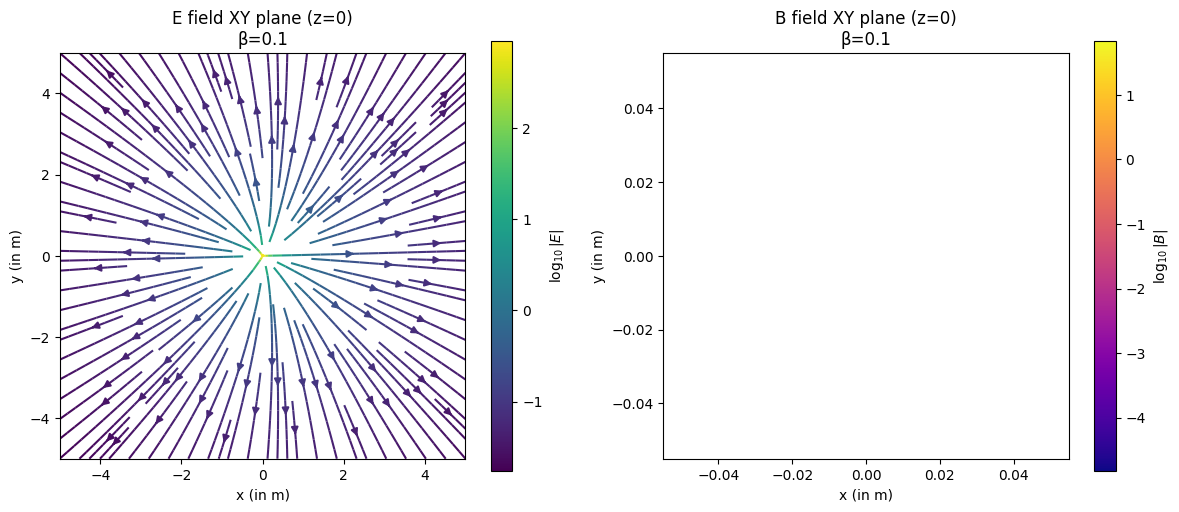

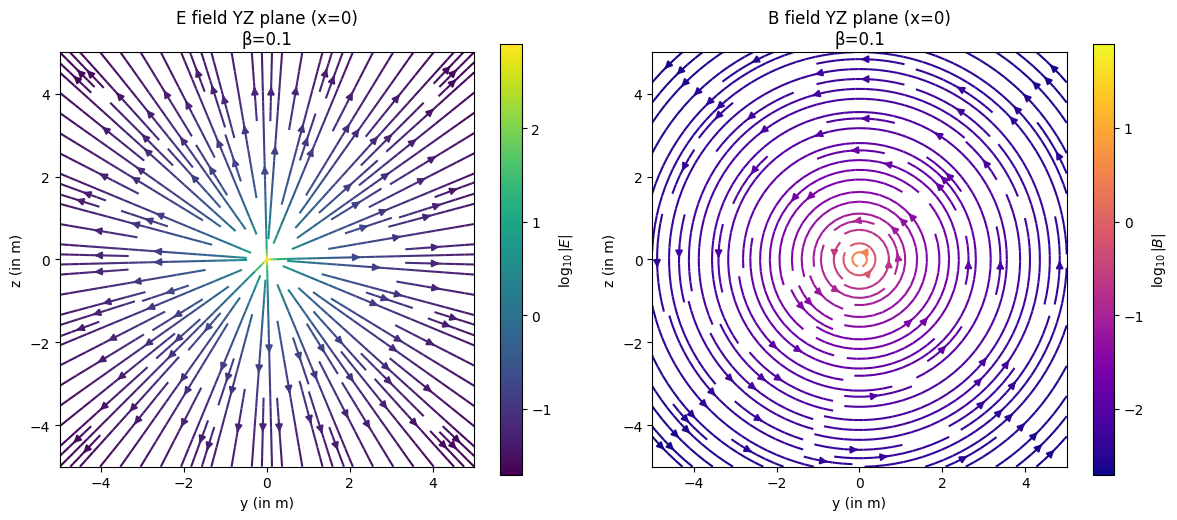

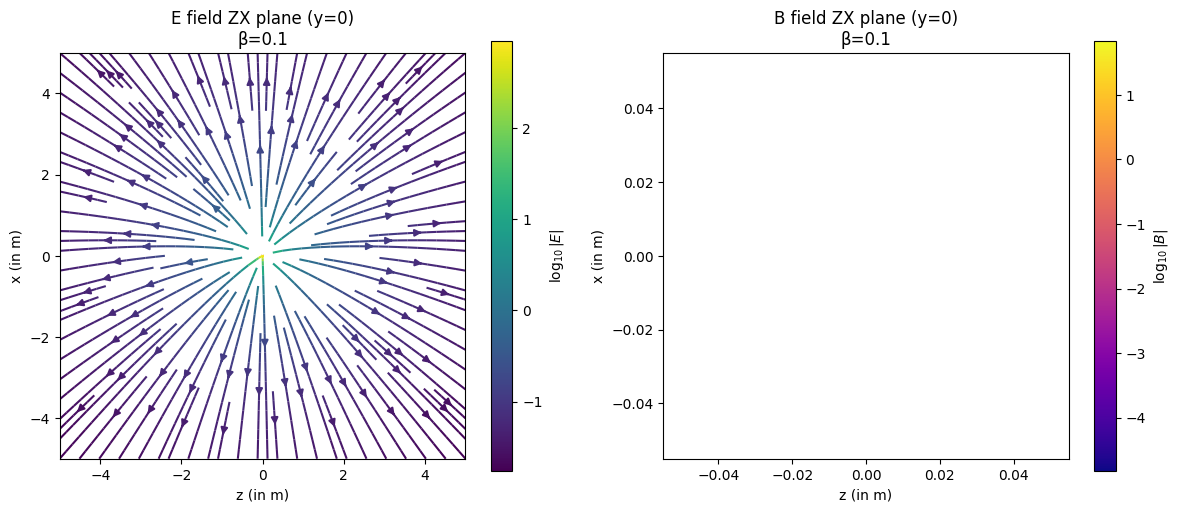

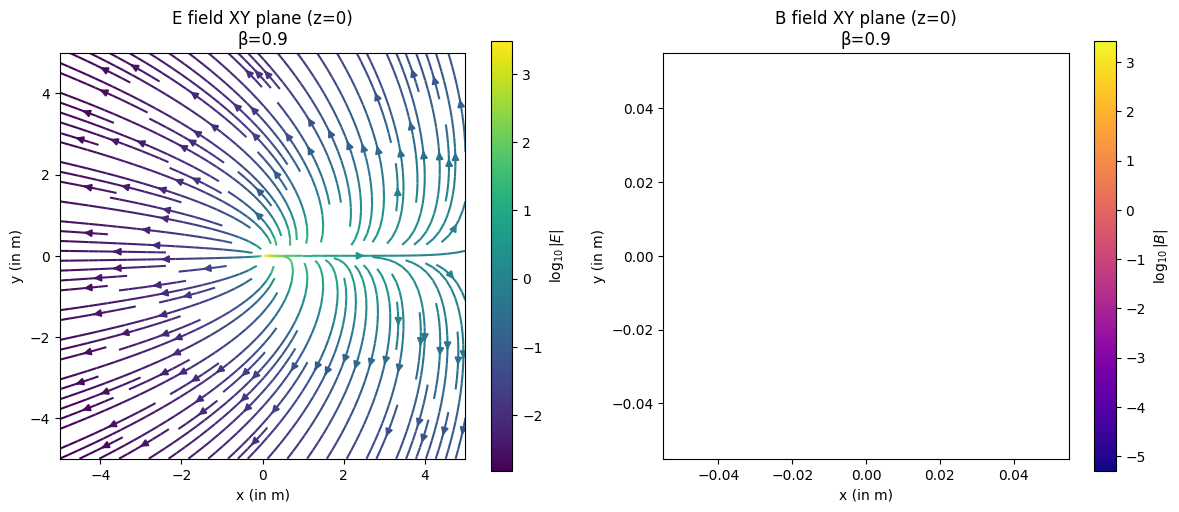

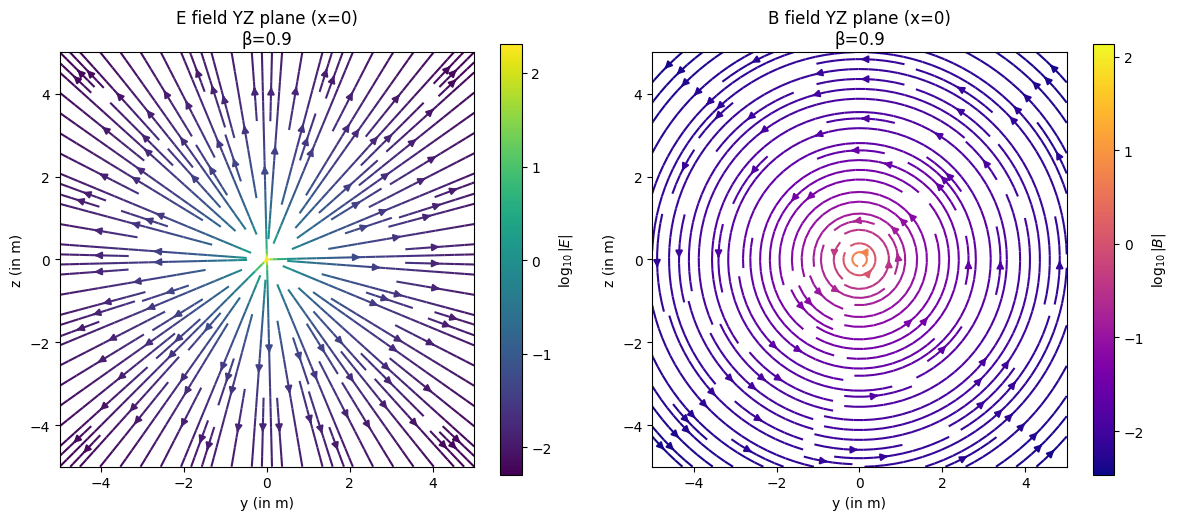

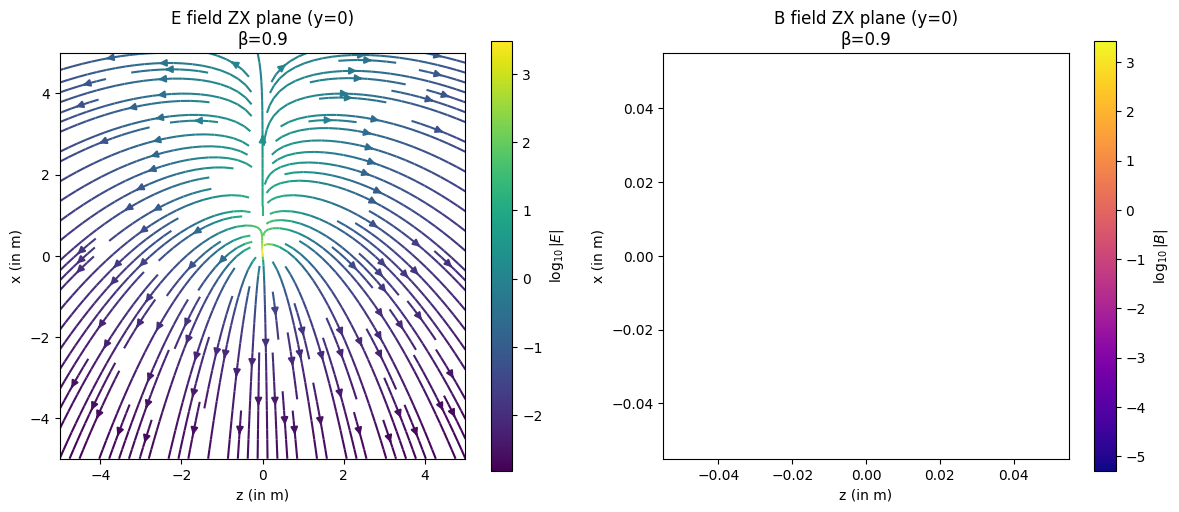

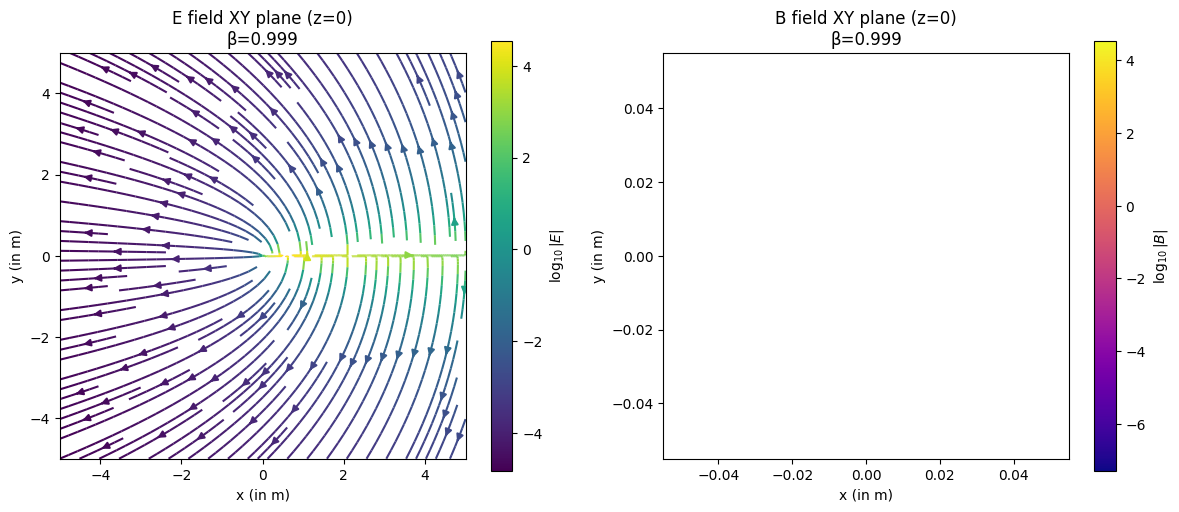

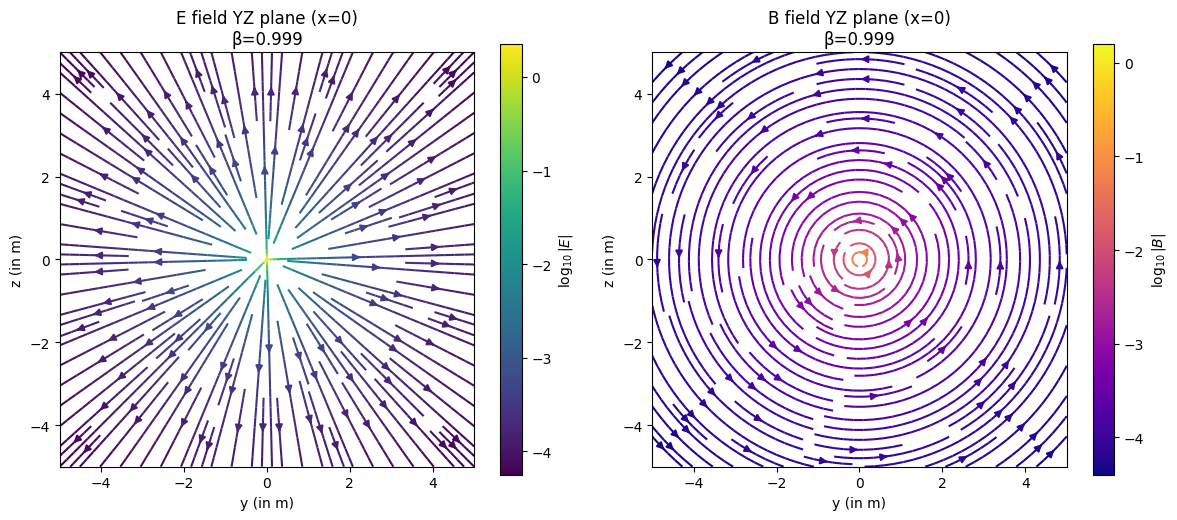

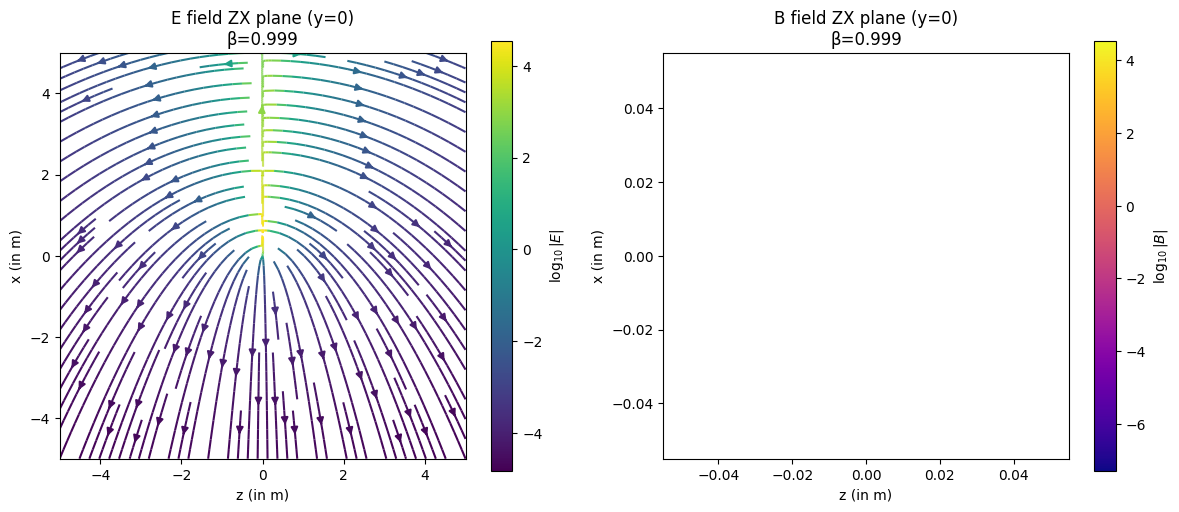

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

# Constants
c = sc.c        # velocity of light 
q = 1.0         #  charge

# Function to compute E and B fields for arbitrary 3D points
def fields(x, y, z, beta):
    R = np.sqrt(x**2 + y**2 + z**2)
    nx, ny, nz = x / R, y / R, z / R
    kappa = 1 - beta * nx
    kappa3R2 = (kappa**3) * (R**2)
    
    # Electric field components
    Ex = q * (1 - beta**2) * (nx - beta) / kappa3R2
    Ey = q * (1 - beta**2) * ny / kappa3R2
    Ez = q * (1 - beta**2) * nz / kappa3R2
    
    # Magnetic field via cross product B = n × E
    Bx = ny * Ez - nz * Ey
    By = nz * Ex - nx * Ez
    Bz = nx * Ey - ny * Ex
    
    return Ex, Ey, Ez, Bx, By, Bz

# Plotting 
def plot_field_plane(plane='xy', beta=0.9, n=200, L=5):
    # define grid
    vals = np.linspace(-L, L, n)
    X, Y = np.meshgrid(vals, vals)
    
    if plane == 'xy':
        x, y, z = X, Y, 0
        title = f"XY plane (z=0)"
        xlabel, ylabel = 'x (in m)', 'y (in m)'
    elif plane == 'yz':
        x, y, z = 0, X, Y
        title = f"YZ plane (x=0)"
        xlabel, ylabel = 'y (in m)', 'z (in m)'
    elif plane == 'zx' or plane == 'xz':
        x, y, z = Y, 0, X
        title = f"ZX plane (y=0)"
        xlabel, ylabel = 'z (in m)', 'x (in m)'
    else:
        raise ValueError("plane must be 'xy', 'yz', or 'zx'")

    # compute fields
    Ex, Ey, Ez, Bx, By, Bz = fields(x, y, z, beta)
    E_mag = np.sqrt(Ex**2 + Ey**2 + Ez**2)
    B_mag = np.sqrt(Bx**2 + By**2 + Bz**2)

    #  planes for plotting
    if plane == 'xy':
        Ex_plot, Ey_plot = Ex, Ey
        Bx_plot, By_plot = Bx, By
    elif plane == 'yz':
        Ex_plot, Ey_plot = Ey, Ez
        Bx_plot, By_plot = By, Bz
    elif plane == 'zx' or plane == 'xz':
        Ex_plot, Ey_plot = Ez, Ex
        Bx_plot, By_plot = Bz, Bx

    # normalize for direction plotting
    Exn, Eyn = Ex_plot / (E_mag + 1e-20), Ey_plot / (E_mag + 1e-20)
    Bxn, Byn = Bx_plot / (B_mag + 1e-20), By_plot / (B_mag + 1e-20)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')
    
    # Electric field
    eplot = axs[0].streamplot(X, Y, Exn, Eyn, color=np.log10(E_mag+1e-20),
                              cmap='viridis', density=1.4)
    axs[0].set_title(f"E field {title}\nβ={beta}")
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[0].set_aspect('equal')
    fig.colorbar(eplot.lines, ax=axs[0], label=r'$\log_{10}|E|$')

    # Magnetic field 
    bplot = axs[1].streamplot(X, Y, Bxn, Byn, color=np.log10(B_mag+1e-20),
                              cmap='plasma', density=1.4)
    axs[1].set_title(f"B field {title}\nβ={beta}")
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    axs[1].set_aspect('equal')
    fig.colorbar(bplot.lines, ax=axs[1], label=r'$\log_{10}|B|$')

    plt.tight_layout()
    plt.show()

# plots for all velocities and planes 
betas = [0.1, 0.9, 0.999]
planes = ['xy', 'yz', 'zx']

for beta in betas:
    for plane in planes:
        plot_field_plane(plane, beta)


#### Problem 02

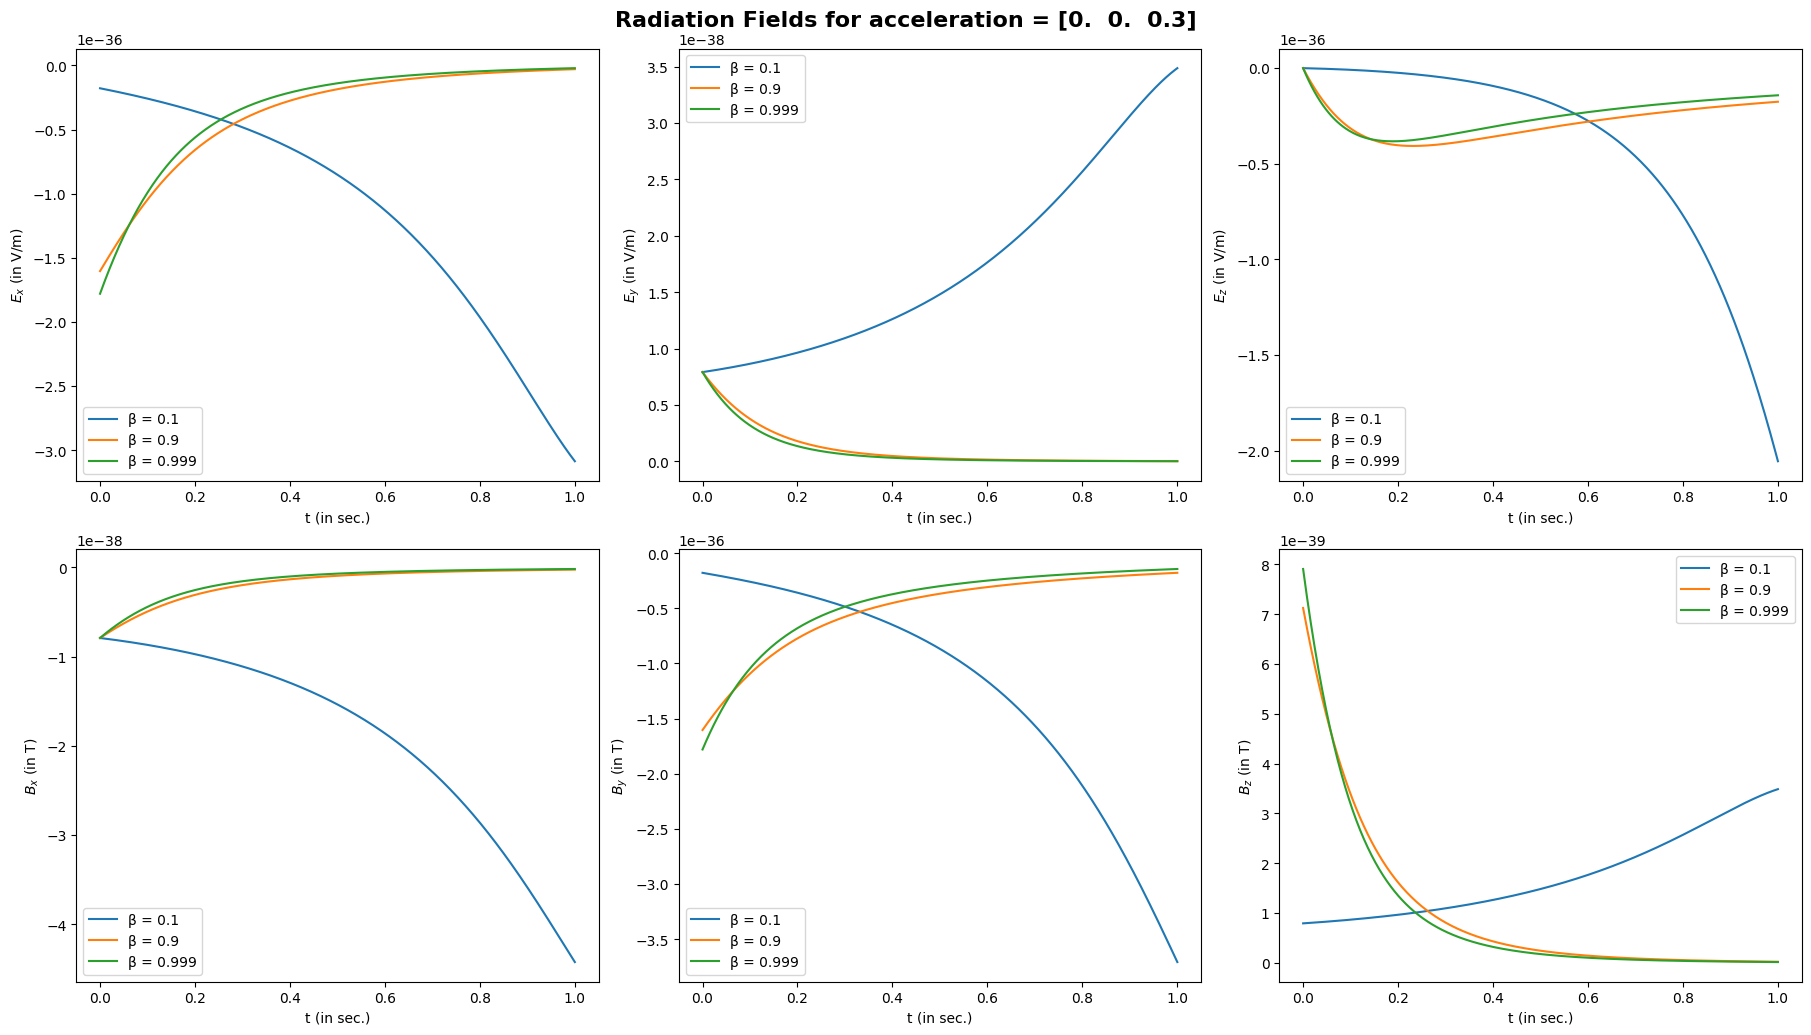

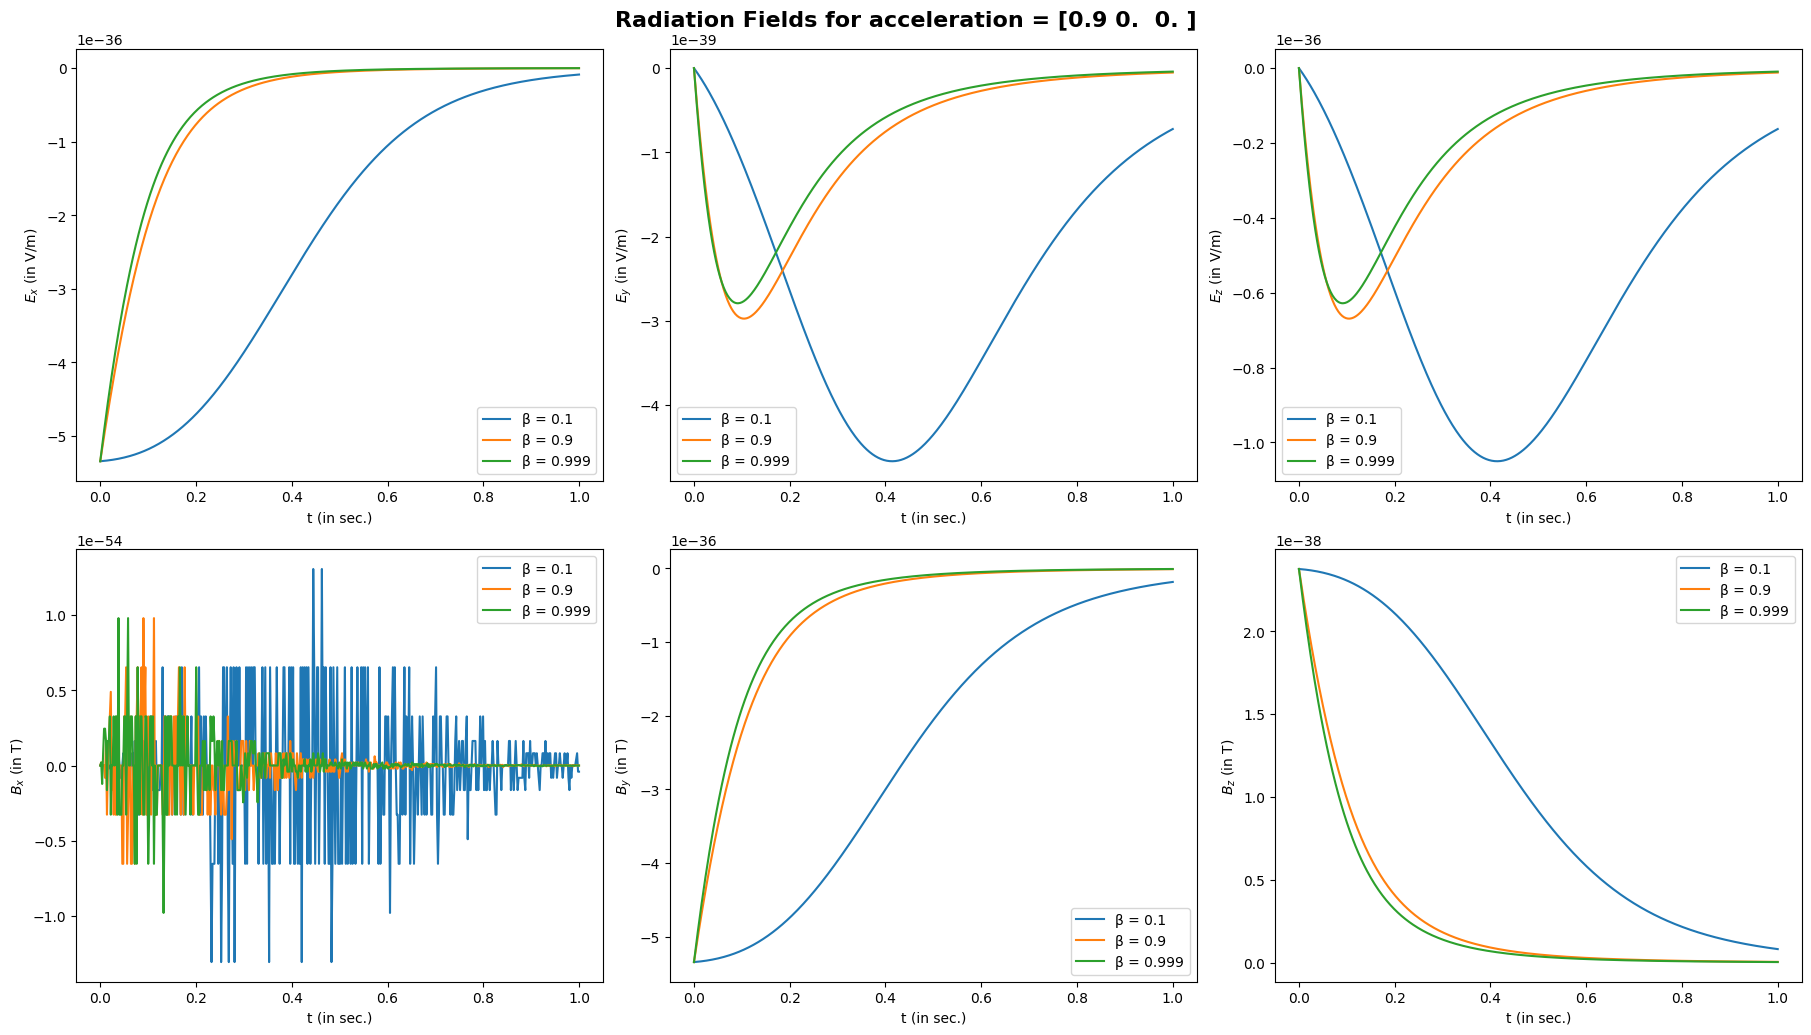

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

# Constants
c = sc.c          # speed of light (in m/s)
q = sc.e          # electronic charge (C)

# Observation point 
R_obs= np.array([1e2, 4e5, 9e7])

# Time array 
t = np.linspace(0, 1.0 , 500)                   # choose based on R_obs/c

# Velocities  
velocities = [0.1, 0.9, 0.999]                   # Betas (v/c)
# Accelerations                                  # \dot(beta) = \dot(v)/c
accelerations = [
    np.array([0, 0, 0.3]),   # along z-axis
    np.array([0.9, 0, 0])    # along x-axis
]

# Define Particle motion
def particle_motion(t, v0_vec, a_vec):
    t = t[:, None]
    v_t = v0_vec * c + a_vec * c * t
    r_t = v0_vec * c * t + 0.5 * a_vec * c * t**2
    beta_t = v_t / c
    return r_t, v_t, beta_t

# Define Radiation fields 
def radiation_fields(q, c, r_obs, v0_vec, a_vec, t):
    r_t, v_t, beta_t = particle_motion(t, v0_vec, a_vec)
    R_vec = r_obs - r_t
    R_mag = np.linalg.norm(R_vec, axis=1)
    n_hat = (R_vec.T / R_mag).T
    kappa = 1 - np.einsum('ij,ij->i', n_hat, beta_t)
    beta_dot = a_vec
    cross_inner = np.cross((n_hat - beta_t), beta_dot)
    E_rad = (q / c) * np.cross(n_hat, cross_inner) / (R_mag[:, None] * kappa[:, None]**3)
    B_rad = np.cross(n_hat, E_rad)
    return E_rad, B_rad

# Plotting
for i, acc_vec in enumerate(accelerations):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)
    
    # Labels for subplots
    field_labels = ['x', 'y', 'z']
    
    for k, comp in enumerate(range(3)):  # component index
        # Electric Field 
        axE = axs[0, k]
        for v_frac in velocities:
            v0_vec = np.array([v_frac, 0, 0])
            E, _ = radiation_fields(q, c, R_obs, v0_vec, acc_vec, t)
            axE.plot(t, E[:, comp], label=f"β = {v_frac}")
        axE.set_xlabel(r"t (in sec.)", fontsize=10)
        axE.set_ylabel(f"$E_{field_labels[comp]}$ (in V/m)", fontsize=10)
        #axE.set_title(f"$E_{field_labels[comp]}$ vs t", fontsize=14)
        axE.legend(loc= 'best')
        #axE.grid(True)
        
        # Magnetic Field 
        axB = axs[1, k]
        for v_frac in velocities:
            v0_vec = np.array([v_frac, 0, 0])
            _, B = radiation_fields(q, c, R_obs, v0_vec, acc_vec, t)
            axB.plot(t, B[:, comp], label=f"β = {v_frac}")
        axB.set_xlabel(r"t (in sec.)", fontsize=10)
        axB.set_ylabel(f"$B_{field_labels[comp]}$ (in T)", fontsize=10)
        #axB.set_title(f"$B_{field_labels[comp]}$ vs t", fontsize=14)
        axB.legend(loc= 'best')
        #axB.grid(True)
    
    fig.suptitle(f"Radiation Fields for acceleration = {acc_vec}", fontsize=16, weight='bold', y=1.02)
    plt.show()


#### Problem 03

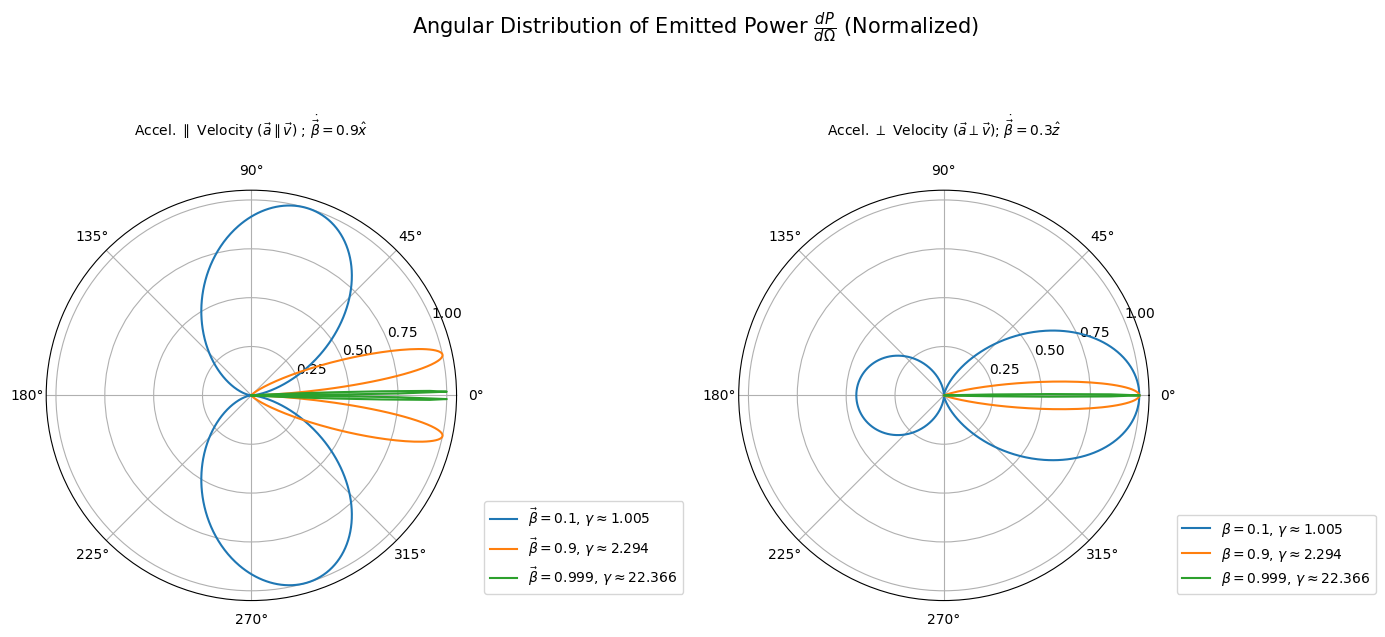

In [30]:
# Angular Distribution of Emitted Power
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

# Constant values
#A= q**2/(4*np.pi*c**3)
A= 1

# Velocities (in units of c)
betas = [0.1, 0.9, 0.999]

# Accelerations (in units of c)
a_z, a_x= 0.3, 0.9

# Lorentz factors
gammas = [1 / np.sqrt(1 - beta**2) for beta in betas]

# Angular range for plotting (0 to 2*pi, covering all directions)
theta = np.linspace(0, 2 * np.pi, 1000)

# Define the Normalized Power Formulas

def power_parallel(beta, theta):
    """
    Normalized power for acceleration parallel to velocity.
    """
    # P_norm = sin^2(theta) / (1 - beta * cos(theta))^6
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    denominator = (1 - beta * cos_theta)**6
    return A * (a_x**2 * sin_theta**2) / denominator

def power_perpendicular(beta, gamma, theta, phi=0):
    """
    Normalized power for acceleration perpendicular to velocity (in v-a plane, phi=0 due to symmetry).
    """
    # P_norm = 1/(1-b*cos(t))^4 * [1 - sin^2(t)*cos^2(phi) / (gamma^2 * (1-b*cos(t))^2)]
    # set phi=0 (in the v-a plane) for plotting.
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    term1 = 1 / (1 - beta * cos_theta)**4
    
    # cos(phi) = 1 since phi=0
    cos_phi_sq = np.cos(phi)**2 
    
    term2_numerator = (sin_theta**2) * cos_phi_sq
    term2_denominator = (gamma**2) * (1 - beta * cos_theta)**2
    
    return A* a_z**2 * term1 * (1 - term2_numerator / term2_denominator)



# Plotting
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 7))
fig.suptitle(r'Angular Distribution of Emitted Power $\frac{dP}{d\Omega}$ (Normalized)', fontsize=15)

# Acceleration Parallel to Velocity (a || v)
ax1 = axes[0]
ax1.set_title(r'Accel. $\parallel$ Velocity ($\vec{a} \parallel \vec{v}$) ; $\dot{\vec{\beta}}= 0.9 \hat{x}$', fontsize=10, pad=20)

max_power_par = 0
for beta, gamma in zip(betas, gammas):
    P_norm = power_parallel(beta, theta)
    # Find the maximum value for consistent scaling
    max_power_par = max(max_power_par, np.max(P_norm))
    
    # Scaling helps visualize the shape and beaming
    P_scaled = P_norm / max_power_par 
    
    ax1.plot(theta, P_scaled, label=r'$\vec{\beta} = ' + str(beta) + r'$, $\gamma \approx ' + f'{gamma:.3f}' + r'$')

ax1.set_theta_zero_location("E")        
ax1.set_theta_direction(1) 
ax1.set_rticks([0.25, 0.5, 0.75, 1.0])  
ax1.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
#ax1.grid(True)


# Acceleration Perpendicular to Velocity (a ⊥ v)
ax2 = axes[1]
ax2.set_title(r'Accel. $\perp$ Velocity ($\vec{a} \perp \vec{v}$); $\dot{\vec{\beta}}= 0.3 \hat{z}$', fontsize=10, pad=20)

max_power_perp = 0
for beta, gamma in zip(betas, gammas):
    P_norm = power_perpendicular(beta, gamma, theta, phi=0)
    max_power_perp = max(max_power_perp, np.max(P_norm))
    
    P_scaled = P_norm / max_power_perp
    
    ax2.plot(theta, P_scaled, label=r'$\beta = ' + str(beta) + r'$, $\gamma \approx ' + f'{gamma:.3f}' + r'$')

ax2.set_theta_zero_location("E")
ax2.set_theta_direction(1)
ax2.set_rticks([0.25, 0.5, 0.75, 1.0])
ax2.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
#ax2.grid(True)

# Final display
plt.tight_layout() 
plt.show()

#### Problem 05

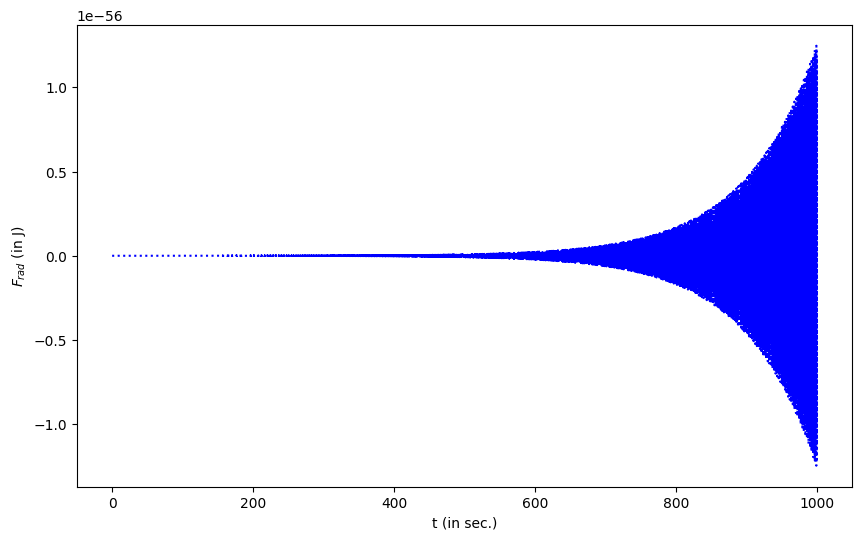

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

# Constants
e = sc.e       # charge of electron (in Coulomb)
V0 = 1         # initial velocity (at t= 0) in m/s 
c = 3e8        # velocity of light (in m/s)  
K = (2 * e**2 * V0) / (3 * c**3)

# Time array
t = np.linspace(0, 1000, 10000)  

# Define Radiation Force as a function of time 
F_rad = K * ((1e-4-900) * np.sin(30*t) + 0.6 * np.cos(30*t)) * np.exp(t/100)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(t, F_rad, color= 'blue', alpha= 1.0, ls= ':')
plt.xlabel(r't (in sec.)', fontsize= 10)
plt.ylabel(r'$F_{rad}$ (in J)', fontsize= 10)
#plt.title('Radiation Force vs Time', fontsize= 12)
#plt.grid(True)
plt.show()

#### Problem 06

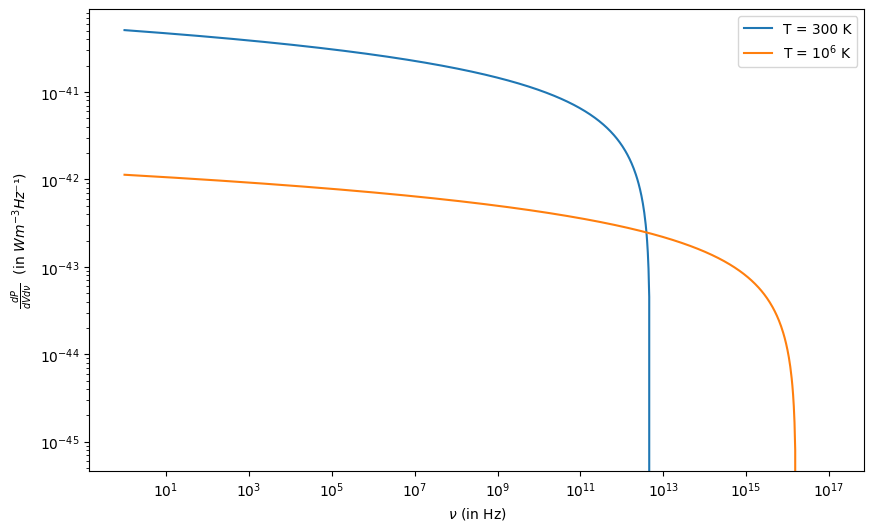

In [29]:
# Thermal Bremsstrahulng Power Emission Spectra

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.constants import e, k, h, c, m_e, pi

# Constants
C = (2**8 * np.sqrt(pi) * e**6) / (45 * np.sqrt(2) * c**3 * m_e**1.5 * k**0.5)
n_e = n_i = 1e20   
Z = 1

# Define the integrand
def integrand(x, T, nu):
    return x * np.exp(-x) * (1 + 0.6*x) * np.log(k*T*x/(pi*h*nu))

# Define the Power per unit frequency per unit volume
def Power(T, nu):
    xmin = h*nu/(k*T)
    I, _ = quad(integrand, xmin, np.inf, args=(T, nu))
    return C * T**(-0.5) * n_e * n_i * Z**2 * I

# Frequency range
freqs = np.logspace(0, 17, 1000)

# Calculate Power per unit freq. per unit volume for T= 300 and T= 10^6 K
P_300 = [Power(300, nu) for nu in freqs]
P_1e6 = [Power(1e6, nu) for nu in freqs]


 #Plotting
plt.figure(figsize=(10,6))
plt.loglog(freqs, P_300, label= r'T = 300 K')
plt.loglog(freqs, P_1e6, label= r'T = $10^6$ K')
plt.xlabel(r'$\nu$ (in Hz)', fontsize= 10)
plt.ylabel(r'$\frac{dP}{dV d\nu}$  (in $W m^{-3} Hz⁻¹)$', fontsize= 10)
#plt.title('Thermal Bremsstrahlung Power Emission Spectra for different Temperatures', fontsize= 15)
plt.legend(loc= 'best')
#plt.grid(True)
plt.show()
